In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from keras import regularizers
import sklearn
from sklearn import svm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [24]:
#train
#test
#load data
path = 'C:/Users/mys12/Desktop/northeastern/summer2018/data_Robust_Fingerprinting-master/DISTRIBUTED_OPENSOURCE/FINGERPRINTING_DB'

test_rss = pd.read_csv(path + '/Training_rss_21Aug17.csv', header = 0)
test_coord = pd.read_csv(path + '/Training_coordinates_21Aug17.csv', header = 0)
test_rss = test_rss.replace(100, 0)

train_rss = pd.read_csv(path + '/Test_rss_21Aug17.csv', header = 0)
train_coord = pd.read_csv(path + '/Test_coordinates_21Aug17.csv', header = 0)
train_rss = train_rss.replace(100, 0)

In [25]:
train = pd.concat([train_rss, train_coord], axis=1, ignore_index=True)
test = pd.concat([test_rss, test_coord], axis=1, ignore_index=True)
train = np.asarray(train)
test = np.asarray(test)

# first floor
train1 = train[train[:,-1]==0.0]
normalizer = preprocessing.Normalizer().fit(train1[:,:-3])
train1_r=normalizer.transform(train1[:,:-3])
train1_c=train1[:,-3:-1]
print(train1_r.shape[1])

test1 = test[test[:,-1]==0.0]
test1_r=normalizer.transform(test1[:,:-3])
test1_c=test1[:,-3:-1]

992


In [26]:
def predata(rss, locations):
    # the origin of the room
    origin = np.amin(locations,axis=0)
    #size of the room
    room_size = np.amax(locations, axis=0)-origin
    # position respect to origin
    train_Yy = locations - origin
    train_Xx = np.asarray(rss, dtype=np.float64)
    return train_Xx, train_Yy

In [27]:
def train_val(rss, locations):
    train_Xx, train_Yy = predata(rss, locations)
    train_x, val_x, train_y, val_y = train_test_split(train_Xx, train_Yy, test_size=0.25)
    return train_x, val_x, train_y, val_y

In [28]:
def accuracy(predictions, labels):
    error = np.sqrt(np.sum((predictions - labels)**2, 1))
    return error, np.mean(error)

In [29]:
train_X, val_X, train_Y, val_Y = train_val(train1_r, train1_c)
test_X, test_Y = predata(test1_r, test1_c)

In [30]:
nb_epochs = 500
batch_size = 64
input_size = 992
num_classes = 2

In [42]:
np.random.seed(5)

In [43]:
def encoder():
    model = Sequential()
    model.add(Dense(512, input_dim=input_size, activation='relu', bias=True))
    model.add(Dense(256, activation='relu', bias=True))
    #model.add(Dense(128, activation='relu', bias=True))
    return model

In [44]:
def decoder(e):   
    #e.add(Dense(256, input_dim=128, activation='relu', bias=True))
    e.add(Dense(512, input_dim=256, activation='relu', bias=True))
    e.add(Dense(input_size, activation='relu', bias=True))
    e.compile(optimizer='adam', loss='mse')
    return e

In [45]:
e = encoder()
d = decoder(e)
d.fit(train_X, train_X, nb_epoch=nb_epochs, batch_size=batch_size)

C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=992, activation="relu", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", use_bias=True)`
  after removing the cwd from sys.path.
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=256, activation="relu", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Ke

Epoch 1/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 2/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 3/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 4/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 5/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 6/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 7/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 8/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 9/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 10/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 11/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 12/500
948/948 [==============================] - 0s - loss: 0.0010     - ETA: 0s - loss: 0.0
Epoch 13/500
948/948 [==================

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 104/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 105/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 106/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 107/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 108/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 109/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 110/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 111/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 112/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 113/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 114/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 115/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 206/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 207/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 208/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 209/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 210/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 211/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 212/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 213/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 214/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 215/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 216/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 217/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 308/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 309/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 310/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 311/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 312/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 313/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 314/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 315/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 316/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 317/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 318/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 319/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 0.0010     
Epoch 410/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 411/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 412/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 413/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 414/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 415/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 416/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 417/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 418/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 419/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 420/500
948/948 [==============================] - 0s - loss: 0.0010     
Epoch 421/500
948/948 [==============================]

In [46]:
def regression(d):
    num_to_remove = 2
    regularzation_penalty = 0.02
    initilization_method = 'he_normal' #'random_uniform' ,'random_normal','TruncatedNormal' ,'glorot_uniform', 'glorot_nomral', 'he_normal', 'he_uniform'
    #Optimizer
    adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    
    for i in range(num_to_remove):
        d.pop()
    d.add(Dense(256, input_dim=256, activation='relu', kernel_initializer=initilization_method, kernel_regularizer=regularizers.l2(regularzation_penalty)))
    d.add(Dropout(0.5))
    d.add(Dense(256, activation='relu', kernel_initializer=initilization_method, kernel_regularizer=regularizers.l2(regularzation_penalty)))
    d.add(Dropout(0.5))
    d.add(Dense(num_classes, activation='linear', kernel_initializer=initilization_method, kernel_regularizer=regularizers.l2(regularzation_penalty)))

    #Model compile
    d.compile(loss='mean_squared_error',
                  optimizer='adam')
    
    return d

In [47]:
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=60, verbose=0, mode='auto')
Model_best= keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

c = regression(d)
c.fit(train_X, train_Y, validation_data=(val_X, val_Y), nb_epoch=nb_epochs, callbacks=[earlyStopping, Model_best], batch_size=batch_size)

C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 948 samples, validate on 316 samples
Epoch 1/500
948/948 [==============================] - 0s - loss: 4518.2428 - val_loss: 3720.3163
Epoch 2/500
948/948 [==============================] - 0s - loss: 1936.9790 - val_loss: 595.4097
Epoch 3/500
948/948 [==============================] - 0s - loss: 585.6693 - val_loss: 323.7258
Epoch 4/500
948/948 [==============================] - 0s - loss: 378.7448 - val_loss: 231.8705
Epoch 5/500
948/948 [==============================] - 0s - loss: 311.5308 - val_loss: 213.9963
Epoch 6/500
948/948 [==============================] - 0s - loss: 272.1058 - val_loss: 193.4090
Epoch 7/500
948/948 [==============================] - 0s - loss: 258.2342 - val_loss: 186.5131
Epoch 8/500
948/948 [==============================] - 0s - loss: 259.8019 - val_loss: 185.4324
Epoch 9/500
948/948 [==============================] - 0s - loss: 240.7082 - val_loss: 178.3651
Epoch 10/500
948/948 [==============================] - 0s - loss: 252.5247 - val_loss:

948/948 [==============================] - 0s - loss: 85.9899 - val_loss: 52.0510
Epoch 87/500
948/948 [==============================] - 0s - loss: 86.4968 - val_loss: 54.6629
Epoch 88/500
948/948 [==============================] - 0s - loss: 82.8338 - val_loss: 53.6218
Epoch 89/500
948/948 [==============================] - 0s - loss: 83.7302 - val_loss: 60.4459
Epoch 90/500
948/948 [==============================] - 0s - loss: 81.8855 - val_loss: 59.6391
Epoch 91/500
948/948 [==============================] - 0s - loss: 87.2097 - val_loss: 55.6509
Epoch 92/500
948/948 [==============================] - 0s - loss: 82.9439 - val_loss: 66.5066
Epoch 93/500
948/948 [==============================] - 0s - loss: 93.3235 - val_loss: 64.6734
Epoch 94/500
948/948 [==============================] - 0s - loss: 81.6865 - val_loss: 56.0803
Epoch 95/500
948/948 [==============================] - 0s - loss: 81.7064 - val_loss: 61.1697
Epoch 96/500
948/948 [==============================] - 0s - lo

948/948 [==============================] - 0s - loss: 75.0074 - val_loss: 52.5374
Epoch 172/500
948/948 [==============================] - 0s - loss: 77.7521 - val_loss: 56.0929
Epoch 173/500
948/948 [==============================] - 0s - loss: 79.5650 - val_loss: 50.9554
Epoch 174/500
948/948 [==============================] - 0s - loss: 70.2876 - val_loss: 53.3236
Epoch 175/500
948/948 [==============================] - 0s - loss: 68.6082 - val_loss: 52.9587
Epoch 176/500
948/948 [==============================] - 0s - loss: 76.4855 - val_loss: 52.6052
Epoch 177/500
948/948 [==============================] - 0s - loss: 74.0225 - val_loss: 55.4615
Epoch 178/500
948/948 [==============================] - 0s - loss: 73.8178 - val_loss: 54.4859
Epoch 179/500
948/948 [==============================] - 0s - loss: 71.3382 - val_loss: 51.2495
Epoch 180/500
948/948 [==============================] - 0s - loss: 73.7324 - val_loss: 50.9470
Epoch 181/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 64.5493 - val_loss: 57.3578
Epoch 257/500
948/948 [==============================] - 0s - loss: 64.9278 - val_loss: 48.7918
Epoch 258/500
948/948 [==============================] - 0s - loss: 69.1532 - val_loss: 50.1718
Epoch 259/500
948/948 [==============================] - 0s - loss: 62.1473 - val_loss: 53.0683
Epoch 260/500
948/948 [==============================] - 0s - loss: 65.4315 - val_loss: 48.9657
Epoch 261/500
948/948 [==============================] - 0s - loss: 62.4796 - val_loss: 53.1197
Epoch 262/500
948/948 [==============================] - 0s - loss: 64.1667 - val_loss: 48.9472
Epoch 263/500
948/948 [==============================] - 0s - loss: 65.4452 - val_loss: 50.3408
Epoch 264/500
948/948 [==============================] - 0s - loss: 68.8389 - val_loss: 52.6109
Epoch 265/500
948/948 [==============================] - 0s - loss: 59.1986 - val_loss: 50.7588
Epoch 266/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 55.8929 - val_loss: 49.8901
Epoch 342/500
948/948 [==============================] - 0s - loss: 52.0215 - val_loss: 45.3115
Epoch 343/500
948/948 [==============================] - 0s - loss: 59.3226 - val_loss: 46.2784
Epoch 344/500
948/948 [==============================] - 0s - loss: 56.9189 - val_loss: 46.3836
Epoch 345/500
948/948 [==============================] - 0s - loss: 61.0887 - val_loss: 55.6026
Epoch 346/500
948/948 [==============================] - 0s - loss: 63.5736 - val_loss: 54.2386
Epoch 347/500
948/948 [==============================] - 0s - loss: 55.8613 - val_loss: 50.8069
Epoch 348/500
948/948 [==============================] - 0s - loss: 55.9401 - val_loss: 48.0285
Epoch 349/500
948/948 [==============================] - 0s - loss: 57.1156 - val_loss: 52.0616
Epoch 350/500
948/948 [==============================] - 0s - loss: 55.3268 - val_loss: 47.2999
Epoch 351/500
948/948 [==============================]

948/948 [==============================] - 0s - loss: 48.9589 - val_loss: 47.1824
Epoch 427/500
948/948 [==============================] - 0s - loss: 51.1996 - val_loss: 47.2909
Epoch 428/500
948/948 [==============================] - 0s - loss: 51.4245 - val_loss: 47.3305
Epoch 429/500
948/948 [==============================] - 0s - loss: 49.6989 - val_loss: 46.3154
Epoch 430/500
948/948 [==============================] - 0s - loss: 53.2020 - val_loss: 49.3361
Epoch 431/500
948/948 [==============================] - 0s - loss: 54.8779 - val_loss: 46.2159
Epoch 432/500
948/948 [==============================] - 0s - loss: 53.3296 - val_loss: 46.0043
Epoch 433/500
948/948 [==============================] - 0s - loss: 55.1354 - val_loss: 46.1275
Epoch 434/500
948/948 [==============================] - 0s - loss: 51.2162 - val_loss: 50.6866
Epoch 435/500
948/948 [==============================] - 0s - loss: 53.2599 - val_loss: 50.2919
Epoch 436/500
948/948 [==============================]

In [48]:
#model evaluate
train_loss = c.evaluate(train_X,train_Y, batch_size=len(train_Y)) #calculate the data in test mode(Keras)
val_loss = c.evaluate(val_X, val_Y, batch_size=len(val_Y))
test_loss = c.evaluate(test_X, test_Y, batch_size=len(test_Y))
print("Loss for training data is",train_loss)
print("Loss for validation data is",val_loss)
print("Loss for test data is",test_loss)
predict_Y = c.predict(test_X)
error, accuracy1 = accuracy(predict_Y, test_Y)

226/226 [==============================] - 0s
Loss for training data is 7.10064792633
Loss for validation data is 45.3382949829
Loss for test data is 73.4685821533


In [49]:
print('The average error:', accuracy1)

The average error: 8.82441610545


In [50]:
print('minimum error:', np.amin(error), 'maximum error:', np.amax(error), 'variance:', np.var(error))

minimum error: 0.656697212306 maximum error: 101.110358685 variance: 62.0252645697


In [51]:
np.median(error)

7.4982784597270147

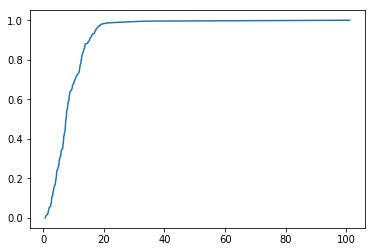

In [52]:
error_sorted= np.sort(error)
p = 1. *np.arange(len(error))/(len(error)-1)
plt.plot(error_sorted, p)
plt.show()